/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


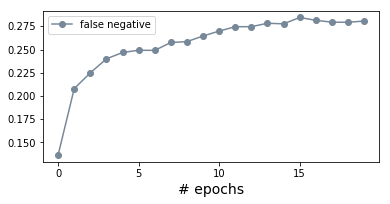

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

def read_data(input_dir):
    with open(os.path.join(input_dir, 'fn_ratio.dat')) as f:
        y1 = [float(x) for x in f][:20]
    with open(os.path.join(input_dir, 'hit_ratio.dat')) as f:
        y2 = [float(x) for x in f][:20]
    return y1, y2

model_dir = '/export/home/xilin/Projects/dtt/model/umls-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.9-400-0.05/'

# hit ratio vs. false negative ratio
fig = plt.figure(figsize=(5.5,2.5))
y1, y2 = read_data(model_dir)
x = np.arange(len(y1))
plt.plot(x, y1, '-o', color='lightslategray')
# plt.yticks(np.arange(min(y1), max(y1), 0.05))
ax = plt.axes()
# ax.set_yticklabels(('22.5%', '27.5%', '32.5%', '37.5%', '42.5%'))
plt.xticks(np.arange(0, 20, 5.0))
# plt.plot(x, y2, '-o')
# plt.yscale('linear')
plt.xlabel('# epochs', fontsize=14)
plt.legend((r'false negative', r'hit'))

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()
fig.tight_layout()
fig.savefig('training_false_negatives.pdf')